In [1]:
import gdown

#### Dataset from google drive.
Original link: https://drive.google.com/file/d/19rxXrANFqmKP0itHX87_iq98dZ57GNGf/view?usp=sharing

In [2]:
file_url = "https://drive.google.com/uc?id=19rxXrANFqmKP0itHX87_iq98dZ57GNGf"
output_file = "plant_disease_per_classes.zip"

gdown.download(file_url, output=output_file)

Downloading...
From (uriginal): https://drive.google.com/uc?id=19rxXrANFqmKP0itHX87_iq98dZ57GNGf
From (redirected): https://drive.google.com/uc?id=19rxXrANFqmKP0itHX87_iq98dZ57GNGf&confirm=t&uuid=1e73e6c9-6c92-4903-a35c-5e52872c63b6
To: C:\Users\Boy DC\Jupyter Notebook\Test\plant_disease_per_classes.zip
100%|█████████████████████████████████████████████████████████████████████████████| 1.25G/1.25G [02:23<00:00, 8.73MB/s]


'plant_disease_per_classes.zip'

#### Unzip dataset

In [3]:
import zipfile

In [4]:
with zipfile.ZipFile('plant_disease_per_classes.zip', 'r') as f:
    f.extractall('./data')

#### Train and validation dir

In [5]:
train_dir_grape = "./data/New Plant Diseases Dataset(Augmented)/train/Grape"
train_dir_pepperbell = "./data/New Plant Diseases Dataset(Augmented)/train/Pepper bell"
train_dir_potato = "./data/New Plant Diseases Dataset(Augmented)/train/Potato"

validation_dir_grape = "./data/New Plant Diseases Dataset(Augmented)/valid/Grape"
validation_dir_pepperbell = "./data/New Plant Diseases Dataset(Augmented)/valid/Pepper bell"
validation_dir_potato = "./data/New Plant Diseases Dataset(Augmented)/valid/Potato"

#### Check path and data

In [6]:
import os

In [7]:
print(f"There are {len(os.listdir(train_dir_grape+'/Grape___Black_rot'))} images of grape black rot")
print(f"There are {len(os.listdir(train_dir_pepperbell+'/Pepper,_bell___Bacterial_spot'))} images of pepper bell bacterial spot")
print(f"There are {len(os.listdir(train_dir_potato+'/Potato___Early_blight'))} images of potato early blight")

There are 1888 images of grape black rot
There are 1913 images of pepper bell bacterial spot
There are 1939 images of potato early blight


In [8]:
import matplotlib.pyplot as plt
from tensorflow.keras.utils import img_to_array, load_img

Sample grape black rot image:


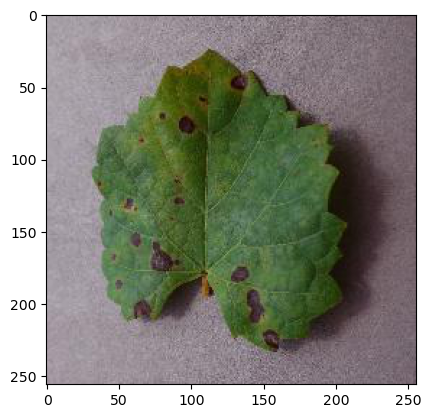

Sample pepper bell bacterial spot image:


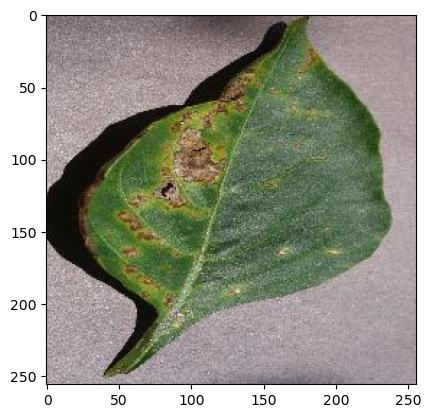

Sample potato early blight image:


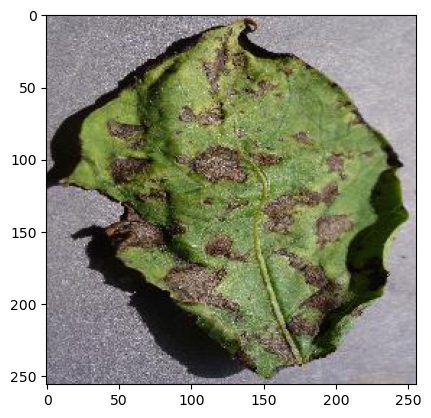

In [9]:
print("Sample grape black rot image:")
plt.imshow(load_img(f"{os.path.join((train_dir_grape+'/Grape___Black_rot'), os.listdir(train_dir_grape+'/Grape___Black_rot')[0])}"))
plt.show()

print("Sample pepper bell bacterial spot image:")
plt.imshow(load_img(f"{os.path.join((train_dir_pepperbell+'/Pepper,_bell___Bacterial_spot'), os.listdir(train_dir_pepperbell+'/Pepper,_bell___Bacterial_spot')[0])}"))
plt.show()

print("Sample potato early blight image:")
plt.imshow(load_img(f"{os.path.join((train_dir_potato+'/Potato___Early_blight'), os.listdir(train_dir_potato+'/Potato___Early_blight')[0])}"))
plt.show()

#### Resolution image

In [10]:
loaded_image = img_to_array(load_img(f"{os.path.join((train_dir_grape+'/Grape___Black_rot'), os.listdir(train_dir_grape+'/Grape___Black_rot')[0])}"))

print(f"Each image has shape: {loaded_image.shape}")

Each image has shape: (256, 256, 3)


#### Split training and validation using ImageDataGenerator
Resizing image to 224x224

In [41]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [42]:
training_datagen = ImageDataGenerator(rescale=1./255,
                                      rotation_range=40,
                                      horizontal_flip=True,
                                      width_shift_range = 0.2,
                                      height_shift_range = 0.2,
                                      zoom_range=0.2)

training_generator_grape = training_datagen.flow_from_directory(directory=train_dir_grape,
                                                                target_size=(224,224),
                                                                class_mode='categorical',
                                                                batch_size=256)

training_generator_pepperbell = training_datagen.flow_from_directory(directory=train_dir_pepperbell,
                                                                target_size=(224,224),
                                                                class_mode='categorical',
                                                                batch_size=256)

training_generator_potato = training_datagen.flow_from_directory(directory=train_dir_potato,
                                                                target_size=(224,224),
                                                                class_mode='categorical',
                                                                batch_size=256)

validation_datagen = ImageDataGenerator(rescale=1./255)

validation_generator_grape = validation_datagen.flow_from_directory(directory=validation_dir_grape,
                                                                    target_size=(224,224),
                                                                    class_mode='categorical',
                                                                    batch_size=256)

validation_generator_pepperbell = validation_datagen.flow_from_directory(directory=validation_dir_pepperbell,
                                                                    target_size=(224,224),
                                                                    class_mode='categorical',
                                                                    batch_size=256)

validation_generator_potato = validation_datagen.flow_from_directory(directory=validation_dir_potato,
                                                                    target_size=(224,224),
                                                                    class_mode='categorical',
                                                                    batch_size=256)

label_classes_grape = list(training_generator_grape.class_indices.keys())
label_classes_perpperbell = list(training_generator_pepperbell.class_indices.keys())
label_classes_potato = list(training_generator_potato.class_indices.keys())

Found 7222 images belonging to 4 classes.
Found 3901 images belonging to 2 classes.
Found 5702 images belonging to 3 classes.
Found 1805 images belonging to 4 classes.
Found 975 images belonging to 2 classes.
Found 1426 images belonging to 3 classes.


In [43]:
print(label_classes_grape)
print(label_classes_perpperbell)
print(label_classes_potato)

['Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Grape___healthy']
['Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy']
['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']


#### Implement transfer learning with ResNet50V2

In [44]:
from tensorflow.keras.applications.resnet_v2 import ResNet50V2

In [45]:
pre_trained_model_grape = ResNet50V2(input_shape=(224,224,3),
                               include_top=False,
                               weights='imagenet')

pre_trained_model_pepperbell = ResNet50V2(input_shape=(224,224,3),
                               include_top=False,
                               weights='imagenet')

pre_trained_model_potato = ResNet50V2(input_shape=(224,224,3),
                               include_top=False,
                               weights='imagenet')

pre_trained_model_grape.summary()

Model: "resnet50v2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_10 (InputLayer)          [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_10[0][0]']               
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                         

                                                                                                  
 conv2_block3_preact_relu (Acti  (None, 56, 56, 256)  0          ['conv2_block3_preact_bn[0][0]'] 
 vation)                                                                                          
                                                                                                  
 conv2_block3_1_conv (Conv2D)   (None, 56, 56, 64)   16384       ['conv2_block3_preact_relu[0][0]'
                                                                 ]                                
                                                                                                  
 conv2_block3_1_bn (BatchNormal  (None, 56, 56, 64)  256         ['conv2_block3_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv2_blo

                                                                                                  
 conv3_block2_2_conv (Conv2D)   (None, 28, 28, 128)  147456      ['conv3_block2_2_pad[0][0]']     
                                                                                                  
 conv3_block2_2_bn (BatchNormal  (None, 28, 28, 128)  512        ['conv3_block2_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv3_block2_2_relu (Activatio  (None, 28, 28, 128)  0          ['conv3_block2_2_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv3_block2_3_conv (Conv2D)   (None, 28, 28, 512)  66048       ['conv3_block2_2_relu[0][0]']    
          

 vation)                                                                                          
                                                                                                  
 conv4_block1_1_conv (Conv2D)   (None, 14, 14, 256)  131072      ['conv4_block1_preact_relu[0][0]'
                                                                 ]                                
                                                                                                  
 conv4_block1_1_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block1_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block1_1_relu (Activatio  (None, 14, 14, 256)  0          ['conv4_block1_1_bn[0][0]']      
 n)                                                                                               
          

 conv4_block3_2_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block3_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block3_2_relu (Activatio  (None, 14, 14, 256)  0          ['conv4_block3_2_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block3_3_conv (Conv2D)   (None, 14, 14, 1024  263168      ['conv4_block3_2_relu[0][0]']    
                                )                                                                 
                                                                                                  
 conv4_block3_out (Add)         (None, 14, 14, 1024  0           ['conv4_block2_out[0][0]',       
          

                                                                 ]                                
                                                                                                  
 conv4_block6_1_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block6_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block6_1_relu (Activatio  (None, 14, 14, 256)  0          ['conv4_block6_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block6_2_pad (ZeroPaddin  (None, 16, 16, 256)  0          ['conv4_block6_1_relu[0][0]']    
 g2D)                                                                                             
          

                                                                                                  
 conv5_block2_2_relu (Activatio  (None, 7, 7, 512)   0           ['conv5_block2_2_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv5_block2_3_conv (Conv2D)   (None, 7, 7, 2048)   1050624     ['conv5_block2_2_relu[0][0]']    
                                                                                                  
 conv5_block2_out (Add)         (None, 7, 7, 2048)   0           ['conv5_block1_out[0][0]',       
                                                                  'conv5_block2_3_conv[0][0]']    
                                                                                                  
 conv5_block3_preact_bn (BatchN  (None, 7, 7, 2048)  8192        ['conv5_block2_out[0][0]']       
 ormalizat

#### Freeze layers except the last 30

In [46]:
for layer in pre_trained_model_grape.layers[:-30]:
    layer.trainable = False
    
for layer in pre_trained_model_pepperbell.layers[:-30]:
    layer.trainable = False
    
for layer in pre_trained_model_potato.layers[:-30]:
    layer.trainable = False

#### Define callback

In [47]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy') >= 0.99 and logs.get('val_accuracy')>=0.99):
      print("\nReached 99% val accuracy so cancelling training!")
      self.model.stop_training = True

#### Define model

In [48]:
model_grape = tf.keras.models.Sequential([
    pre_trained_model_grape,
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(len(label_classes_grape), activation='softmax')
])

model_pepperbell = tf.keras.models.Sequential([
    pre_trained_model_pepperbell,
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(len(label_classes_perpperbell), activation='softmax')
])

model_potato = tf.keras.models.Sequential([
    pre_trained_model_potato,
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(len(label_classes_potato), activation='softmax')
])

model_grape.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model_pepperbell.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model_potato.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [49]:
callbacks = myCallback()

history_grape = model_grape.fit(training_generator_grape,
                                validation_data=validation_generator_grape,
                                callbacks=callbacks,
                                epochs = 20)

Epoch 1/20
29/29 [==============================] - 53s 2s/step - loss: 0.9568 - accuracy: 0.8833 - val_loss: 272.2650 - val_accuracy: 0.5296
Epoch 2/20
29/29 [==============================] - 50s 2s/step - loss: 0.0542 - accuracy: 0.9801 - val_loss: 8.6057 - val_accuracy: 0.8870
Epoch 3/20
29/29 [==============================] - 50s 2s/step - loss: 0.0293 - accuracy: 0.9910 - val_loss: 1.1286 - val_accuracy: 0.9612
Epoch 4/20
29/29 [==============================] - 50s 2s/step - loss: 0.0257 - accuracy: 0.9911 - val_loss: 0.2094 - val_accuracy: 0.9717
Epoch 5/20
29/29 [==============================] - ETA: 0s - loss: 0.0195 - accuracy: 0.9946
Reached 99% val accuracy so cancelling training!
29/29 [==============================] - 51s 2s/step - loss: 0.0195 - accuracy: 0.9946 - val_loss: 0.1000 - val_accuracy: 0.9917


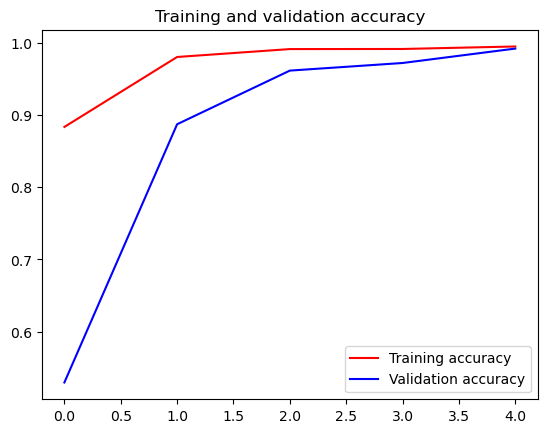

<Figure size 640x480 with 0 Axes>

In [50]:
# Plot the results
acc = history_grape.history['accuracy']
val_acc = history_grape.history['val_accuracy']
loss = history_grape.history['loss']
val_loss = history_grape.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

plt.show()

In [51]:
history_pepperbell = model_pepperbell.fit(training_generator_pepperbell,
                                validation_data=validation_generator_pepperbell,
                                callbacks=callbacks,
                                epochs = 20)

Epoch 1/20
16/16 [==============================] - 44s 3s/step - loss: 1.5412 - accuracy: 0.8531 - val_loss: 20.6487 - val_accuracy: 0.7795
Epoch 2/20
16/16 [==============================] - 27s 2s/step - loss: 0.0736 - accuracy: 0.9741 - val_loss: 56.7111 - val_accuracy: 0.5231
Epoch 3/20
16/16 [==============================] - 27s 2s/step - loss: 0.0390 - accuracy: 0.9856 - val_loss: 15.0868 - val_accuracy: 0.6646
Epoch 4/20
16/16 [==============================] - 27s 2s/step - loss: 0.0308 - accuracy: 0.9892 - val_loss: 0.6534 - val_accuracy: 0.9579
Epoch 5/20
16/16 [==============================] - 28s 2s/step - loss: 0.0261 - accuracy: 0.9931 - val_loss: 1.1742 - val_accuracy: 0.9221
Epoch 6/20
16/16 [==============================] - 28s 2s/step - loss: 0.0251 - accuracy: 0.9910 - val_loss: 0.3328 - val_accuracy: 0.9774
Epoch 7/20
16/16 [==============================] - 28s 2s/step - loss: 0.0166 - accuracy: 0.9936 - val_loss: 1.7618 - val_accuracy: 0.9026
Epoch 8/20
16/16 

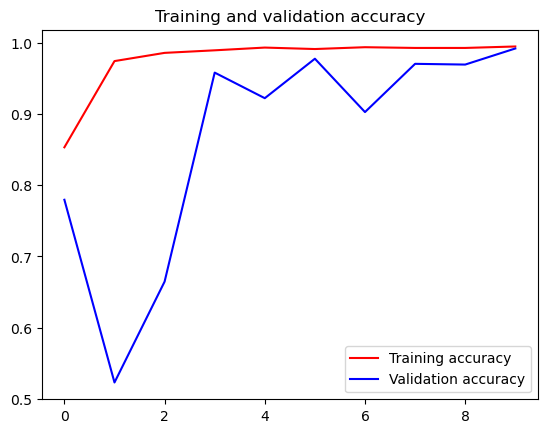

<Figure size 640x480 with 0 Axes>

In [52]:
# Plot the results
acc = history_pepperbell.history['accuracy']
val_acc = history_pepperbell.history['val_accuracy']
loss = history_pepperbell.history['loss']
val_loss = history_pepperbell.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

plt.show()

In [53]:
history_potato = model_potato.fit(training_generator_potato,
                                validation_data=validation_generator_potato,
                                callbacks=callbacks,
                                epochs = 20)

Epoch 1/20
23/23 [==============================] - 62s 3s/step - loss: 1.8536 - accuracy: 0.7724 - val_loss: 716.3627 - val_accuracy: 0.3513
Epoch 2/20
23/23 [==============================] - 41s 2s/step - loss: 0.1277 - accuracy: 0.9563 - val_loss: 162.6864 - val_accuracy: 0.5203
Epoch 3/20
23/23 [==============================] - 41s 2s/step - loss: 0.0855 - accuracy: 0.9698 - val_loss: 5.8671 - val_accuracy: 0.7903
Epoch 4/20
23/23 [==============================] - 41s 2s/step - loss: 0.0478 - accuracy: 0.9833 - val_loss: 2.6365 - val_accuracy: 0.8198
Epoch 5/20
23/23 [==============================] - 40s 2s/step - loss: 0.0439 - accuracy: 0.9830 - val_loss: 0.8911 - val_accuracy: 0.9495
Epoch 6/20
23/23 [==============================] - 40s 2s/step - loss: 0.0268 - accuracy: 0.9923 - val_loss: 0.6231 - val_accuracy: 0.9313
Epoch 7/20
23/23 [==============================] - ETA: 0s - loss: 0.0302 - accuracy: 0.9916
Reached 99% val accuracy so cancelling training!
23/23 [======

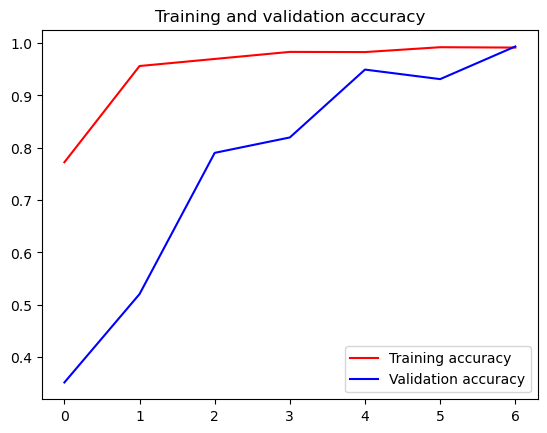

<Figure size 640x480 with 0 Axes>

In [54]:
# Plot the results
acc = history_potato.history['accuracy']
val_acc = history_potato.history['val_accuracy']
loss = history_potato.history['loss']
val_loss = history_potato.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

plt.show()

In [55]:
model_grape.save(f'./trained_model/grape_model/grape_model.h5')

In [56]:
model_pepperbell.save(f'./trained_model/pepperbell_model/pepperbell_model.h5')

In [57]:
model_potato.save(f'./trained_model/potato_model/potato_model.h5')

#### Model inference

In [1]:
import os
import tensorflow as tf

loaded_grape = tf.keras.models.load_model('./trained_model/grape_model/grape_model.h5')
loaded_pepperbell = tf.keras.models.load_model('./trained_model/pepperbell_model/pepperbell_model.h5')
loaded_potato = tf.keras.models.load_model('./trained_model/potato_model/potato_model.h5')

In [2]:
label_grape = ['Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Grape___healthy']
label_pepperbell = ['Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy']
label_potato = ['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [3]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.utils import img_to_array, load_img

images = os.listdir("./test_images/potato/")

print(images)

for i in images:
    print()
    # predicting images
    path = './test_images/potato/' + i
    img = load_img(path, target_size=(224, 224))
    x = img_to_array(img)
    x = x / 255.0
    x = np.expand_dims(x, axis=0)
    
    images = np.vstack([x])
    classes = loaded_potato.predict(images, batch_size=10)
    print(path)
    print(classes)
    print(label_potato[np.argmax(classes)])
    print(np.argmax(classes))

['lateblight1.png', 'lateblight1copy.png', 'lateblight99.webp', 'PotatoEarlyBlight1.JPG', 'PotatoEarlyBlight2.JPG', 'PotatoEarlyBlight3.JPG', 'PotatoEarlyBlight4.JPG', 'PotatoEarlyBlight5.JPG', 'PotatoHealthy1.JPG', 'PotatoHealthy2.JPG']

1/1 [==============================] - 2s 2s/step
./test_images/potato/lateblight1.png
[[1.1903063e-05 9.9998546e-01 2.5784684e-06]]
Potato___Late_blight
1

1/1 [==============================] - 0s 20ms/step
./test_images/potato/lateblight1copy.png
[[7.2542005e-03 9.9206990e-01 6.7591883e-04]]
Potato___Late_blight
1

1/1 [==============================] - 0s 18ms/step
./test_images/potato/lateblight99.webp
[[1.3747617e-20 1.0000000e+00 2.7192694e-21]]
Potato___Late_blight
1

1/1 [==============================] - 0s 16ms/step
./test_images/potato/PotatoEarlyBlight1.JPG
[[1. 0. 0.]]
Potato___Early_blight
0

1/1 [==============================] - 0s 17ms/step
./test_images/potato/PotatoEarlyBlight2.JPG
[[1. 0. 0.]]
Potato___Early_blight
0

1/1 [=======

In [4]:
images = os.listdir("./test_images/grape/")

print(images)

for i in images:
    print()
    # predicting images
    path = './test_images/grape/' + i
    img = load_img(path, target_size=(224, 224))
    x = img_to_array(img)
    x = x / 255.0
    x = np.expand_dims(x, axis=0)
    
    images = np.vstack([x])
    classes = loaded_grape.predict(images, batch_size=10)
    print(path)
    print(classes)
    print(label_grape[np.argmax(classes)])
    print(np.argmax(classes))

['black_rot1.jpg', 'black_rot2.jpg', 'blight1.JPG', 'blight2.jpg', 'blight3.jpg', 'esca2.jpg', 'esca4.webp', 'healthy1.jpg']

1/1 [==============================] - 0s 440ms/step
./test_images/grape/black_rot1.jpg
[[1.0000000e+00 5.4711362e-14 1.7854863e-19 1.4537686e-18]]
Grape___Black_rot
0

1/1 [==============================] - 0s 16ms/step
./test_images/grape/black_rot2.jpg
[[1.0000000e+00 3.3876131e-18 6.0506077e-24 6.5835535e-23]]
Grape___Black_rot
0

1/1 [==============================] - 0s 18ms/step
./test_images/grape/blight1.JPG
[[0. 0. 1. 0.]]
Grape___Leaf_blight_(Isariopsis_Leaf_Spot)
2

1/1 [==============================] - 0s 17ms/step
./test_images/grape/blight2.jpg
[[0. 0. 1. 0.]]
Grape___Leaf_blight_(Isariopsis_Leaf_Spot)
2

1/1 [==============================] - 0s 16ms/step
./test_images/grape/blight3.jpg
[[1.6572920e-21 1.9428237e-23 1.0000000e+00 3.7944342e-28]]
Grape___Leaf_blight_(Isariopsis_Leaf_Spot)
2

1/1 [==============================] - 0s 16ms/step
./t

In [5]:
images = os.listdir("./test_images/pepperbell/")

print(images)

for i in images:
    print()
    # predicting images
    path = './test_images/pepperbell/' + i
    img = load_img(path, target_size=(224, 224))
    x = img_to_array(img)
    x = x / 255.0
    x = np.expand_dims(x, axis=0)
    
    images = np.vstack([x])
    classes = loaded_pepperbell.predict(images, batch_size=10)
    print(path)
    print(classes)
    print(label_pepperbell[np.argmax(classes)])
    print(np.argmax(classes))

['bacte1.jpg', 'bacte2.jpg', 'bacte3.jpg', 'healthy.png']

1/1 [==============================] - 0s 481ms/step
./test_images/pepperbell/bacte1.jpg
[[1. 0.]]
Pepper,_bell___Bacterial_spot
0

1/1 [==============================] - 0s 15ms/step
./test_images/pepperbell/bacte2.jpg
[[1. 0.]]
Pepper,_bell___Bacterial_spot
0

1/1 [==============================] - 0s 15ms/step
./test_images/pepperbell/bacte3.jpg
[[1.000000e+00 6.529832e-37]]
Pepper,_bell___Bacterial_spot
0

1/1 [==============================] - 0s 15ms/step
./test_images/pepperbell/healthy.png
[[1.320503e-06 9.999987e-01]]
Pepper,_bell___healthy
1


In [2]:
from tensorflow.keras.utils import plot_model

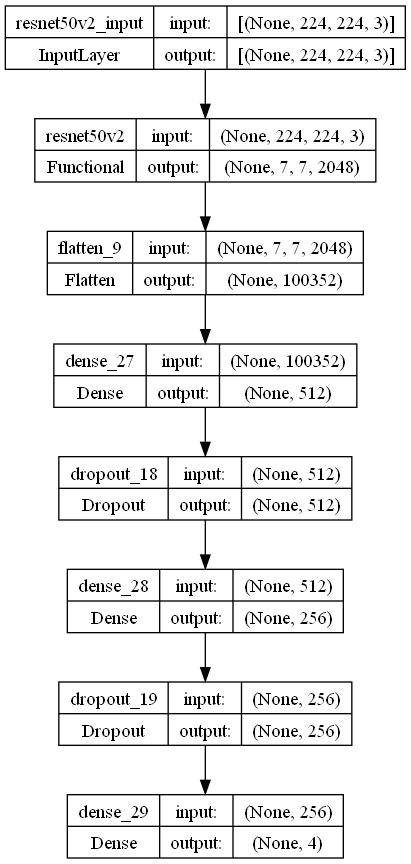

In [6]:
plot_model(loaded_grape, show_shapes=True, show_layer_names=True, to_file='grape-model.png')

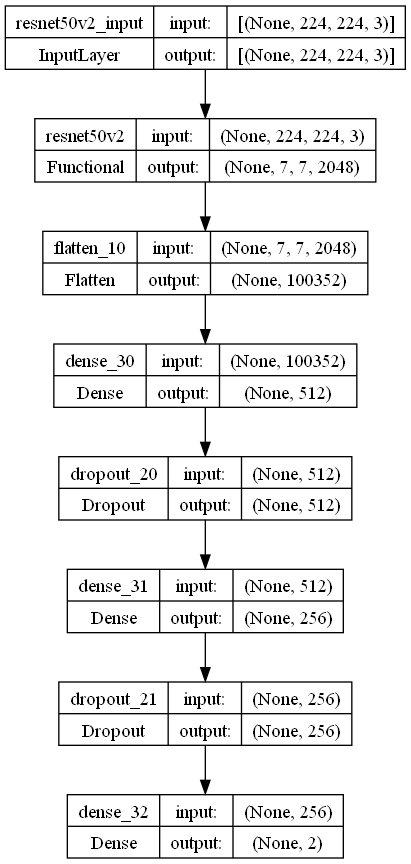

In [7]:
plot_model(loaded_pepperbell, show_shapes=True, show_layer_names=True, to_file='pepperbell-model.png')

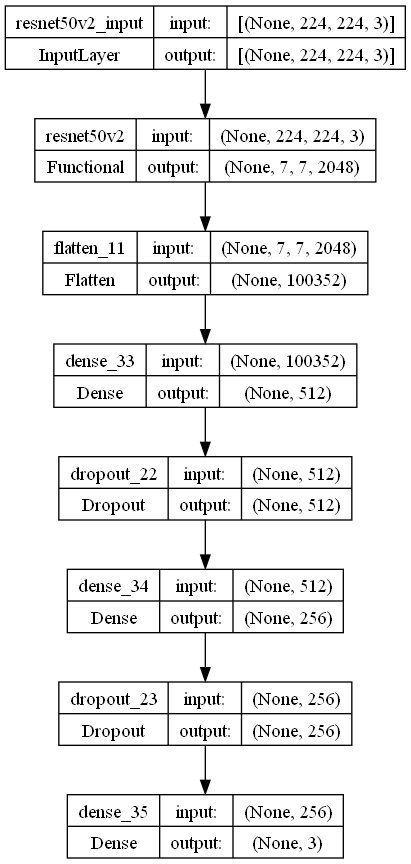

In [8]:
plot_model(loaded_potato, show_shapes=True, show_layer_names=True, to_file='potato-model.png')